**installing required libraries**


Librosa is a Python package for music and audio analysis, offering tools for feature extraction, visualization, and manipulation. Resampy is a dependency providing high-quality resampling algorithms. Together, they empower developers and researchers to efficiently work with audio data in various applications, from music information retrieval to sound processing.

Py7zr is a Python library that enables the creation and extraction of 7z archives, providing efficient compression and decompression capabilities for handling large datasets and files with ease. It offers a simple yet powerful interface for managing 7z files directly within Python applications.


In [1]:
!pip uninstall -y librosa resampy
!pip install librosa resampy

Found existing installation: librosa 0.10.1
Uninstalling librosa-0.10.1:
  Successfully uninstalled librosa-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.6 MB/s eta 0:00:00


**installing required library**

Py7zr is a Python library that enables the creation and extraction of 7z archives, providing efficient compression and decompression capabilities for handling large datasets and files with ease. It offers a simple yet powerful interface for managing 7z files directly within Python applications.


In [6]:
pip install py7zr

**Importing required libraries**

1. `numpy`: A fundamental package for numerical computing in Python, providing powerful array operations and mathematical functions.
2. `tensorflow`: An open-source machine learning framework for building and training neural networks.
3. `tensorflow.keras.layers`: Components for constructing neural network layers conveniently within TensorFlow's Keras API.
4. `sklearn.model_selection`: Tools for splitting datasets into training and testing sets, part of the scikit-learn library.
5. `sklearn.metrics`: Functions for evaluating model performance metrics such as f1 score, ROC curve, AUC, confusion matrix, and classification report.
6. `sklearn.preprocessing`: Utilities for preprocessing data, including label encoding, scaling, and normalization, from scikit-learn.
7. `matplotlib.pyplot`: A plotting library for creating static, animated, and interactive visualizations in Python.
8. `py7zr`: A Python library for creating and extracting 7z archives.
9. `librosa`: A Python package for music and audio analysis, providing tools for feature extraction, visualization, and manipulation.
10. `os`: A module providing a portable way to interact with the operating system, facilitating file and directory manipulation.

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import py7zr
import librosa
import os

**Extracting files**

The below Python code extracts the contents of a .7z file located at 'file_path' and saves them into the directory specified by 'extracted_dir'. It utilizes the py7zr library to handle the extraction process, ensuring that the directory is created if it doesn't exist, and finally prints a completion message.

In [8]:


# Path to your .7z file
file_path = '/content/drive/MyDrive/cv_project/samples.7z'

# Directory to extract the contents of the .7z file
extracted_dir = '/content/drive/MyDrive/cv_project/'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the .7z file
with py7zr.SevenZipFile(file_path, mode='r') as z:
    z.extractall(path=extracted_dir)

print("Extraction completed.")

Extraction completed.


**Loading files**

This Python function loads audio data from files located in the specified directory. It divides each audio file into chunks of a specified duration and extracts features from each chunk using a helper function called `extract_features_from_audio()`. It then encodes the class labels extracted from the file names and splits the data into training and testing sets using `train_test_split()` from scikit-learn, with a specified test size and random state.

In [10]:
def load_data(test_size=0.2, chunk_duration=1):
    x, y = [], []
    for file in os.listdir('/content/drive/MyDrive/cv_project/samples'):
        # Load audio file
        audio, sample_rate = librosa.load('/content/drive/MyDrive/cv_project/samples/' + file, res_type='kaiser_fast')

        # Calculate number of chunks
        num_chunks = int(np.ceil(len(audio) / (sample_rate * chunk_duration)))

        # Extract features from each chunk
        for i in range(num_chunks):
            start = int(i * sample_rate * chunk_duration)
            end = min(len(audio), int((i + 1) * sample_rate * chunk_duration))
            chunk_audio = audio[start:end]

            # Extract features from audio chunk
            feature = extract_features_from_audio(chunk_audio, sample_rate)
            x.append(feature)

            # Extract class label from the file name
            class_label = file.split('(')[0]  # Assuming the class label is before the first '-'
            y.append(class_label)

    # Encode the labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    return train_test_split(np.array(x), y, test_size=test_size, random_state=42)

**Features Extraction**

This code defines a function `extract_features_from_audio` that extracts various audio features from an input audio signal. The features extracted include:

1. **MFCC (Mel-frequency cepstral coefficients)**: Extracted using librosa's `mfcc` function. The number of coefficients is set to 40.
  
2. **Chroma Features**: Extracted using `chroma_stft` function, which computes the chromagram from a waveform or power spectrogram.

3. **Mel-scaled Spectrogram**: Extracted using `melspectrogram` function, which computes a mel-scaled spectrogram.
  
4. **Zero-crossing Rate**: Extracted using `zero_crossing_rate` function, which computes the zero-crossing rate of an audio time series.
  
5. **Spectral Bandwidth**: Extracted using `spectral_bandwidth` function, which computes the bandwidth of the power spectrum.

The function allows the user to specify which features to extract by setting the corresponding boolean flags (`mfcc`, `chroma`, `mel`, `zero_crossing_rate`, `spectral_bandwidth`). Additionally, the user can specify the statistic to be applied to the features, such as taking the square root of the sum of squares (`'square_root_sum'`). The extracted features are concatenated into a single numpy array and returned.

In [11]:
def extract_features_from_audio(audio, sample_rate, mfcc=True, chroma=True, mel=True, zero_crossing_rate=True, spectral_bandwidth=True, statistic='square_root_sum'):
    result = []

    if mfcc:
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40, n_fft=1024)
        if statistic == 'square_root_sum':
            mfccs = np.sqrt(np.sum(np.square(mfccs), axis=1))
        # Add other cases for different statistics if needed

        result.append(mfccs)

    if chroma:
        stft = np.abs(librosa.stft(audio, n_fft=1024))
        chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
        if statistic == 'square_root_sum':
            chroma = np.sqrt(np.sum(np.square(chroma), axis=1))
        # Add other cases for different statistics if needed

        result.append(chroma)

    if mel:
        mel = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=1024)
        if statistic == 'square_root_sum':
            mel = np.sqrt(np.sum(np.square(mel), axis=1))
        # Add other cases for different statistics if needed

        result.append(mel)

    if zero_crossing_rate:
        zcr = librosa.feature.zero_crossing_rate(audio)
        if statistic == 'square_root_sum':
            zcr = np.sqrt(np.sum(np.square(zcr), axis=1))
        # Add other cases for different statistics if needed

        result.append(zcr)

    if spectral_bandwidth:
        spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
        if statistic == 'square_root_sum':
            spec_bw = np.sqrt(np.sum(np.square(spec_bw), axis=1))
        # Add other cases for different statistics if needed

        result.append(spec_bw)

    return np.hstack(result)



**Modeling**

This code defines a convolutional neural network (CNN) model with dropout regularization for classification tasks using TensorFlow's Keras API. Here's a breakdown:

1. **Model Architecture Definition**: The function `create_model_with_dropout` defines a CNN architecture using several convolutional layers followed by max-pooling layers, flattening, and dense layers. Dropout layers are added to prevent overfitting by randomly dropping a fraction of input units during training.

2. **Data Loading and Preprocessing**: It assumes that there is a function `load_data` to load and split the dataset into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`). The input shape is updated to include the time dimension for the CNN model.

3. **Model Compilation**: The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss function (suitable for integer encoded class labels), and accuracy as the metric.

4. **Model Training**: The model is trained on the training data (`X_train`, `y_train`) with specified hyperparameters such as the number of epochs (50) and batch size (32). Validation data (`X_test`, `y_test`) is provided for evaluating the model's performance during training.

5. **Model Evaluation**: After training, the model's performance is evaluated on the test set, and the test accuracy is printed.

Overall, this code segment demonstrates the creation, compilation, training, and evaluation of a CNN model with dropout regularization for a classification task.

In [18]:
def create_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Conv1D(64, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(128, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(256, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(256, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))  # Adding dropout layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
    # Load and split the dataset
X_train, X_test, y_train, y_test = load_data(test_size=0.2)
# Update input_shape to have 2 dimensions (samples, time_steps)
input_shape = (X_train.shape[1], 1)
num_classes=4
# Create the model with dropout
model_with_dropout = create_model_with_dropout(input_shape=(X_train.shape[1], 1), num_classes=num_classes)

# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
# Display model summary
model_with_dropout.summary()

# Train the model
model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model_with_dropout.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1912
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=70
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=70
  warnings.warn(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 180, 64)           256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 90, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 88, 128)           24704     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 44, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 42, 256)           98560     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 21, 256)          

**Evaluation Metrics and Visualization**

This code evaluates the performance of a multiclass classification model using various metrics and plots. Here's a brief explanation:

1. **F1 Score Calculation**: Calculates the F1 score, which is the harmonic mean of precision and recall, for the model's predictions.

2. **Confusion Matrix**: Generates a confusion matrix to visualize the model's performance across different classes.

3. **Classification Report**: Displays a detailed classification report showing metrics such as precision, recall, and F1-score for each class.

4. **ROC Curve**: Plots the Receiver Operating Characteristic (ROC) curve for each class, which illustrates the trade-off between true positive rate (sensitivity) and false positive rate.

5. **Precision-Recall Curve**: Plots the precision-recall curve for each class, which shows the trade-off between precision and recall at different thresholds.

Overall, these metrics and plots provide insights into the model's ability to classify instances correctly across different classes and help in understanding its performance characteristics.

F1 Score: 0.8524540517961571
Confusion Matrix:
[[16  1  0  4]
 [ 1 37  0  3]
 [ 0  1 32  4]
 [ 0  0  5 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.95      0.90      0.92        41
           2       0.86      0.86      0.86        37
           3       0.67      0.81      0.73        27

    accuracy                           0.85       126
   macro avg       0.86      0.84      0.84       126
weighted avg       0.86      0.85      0.85       126



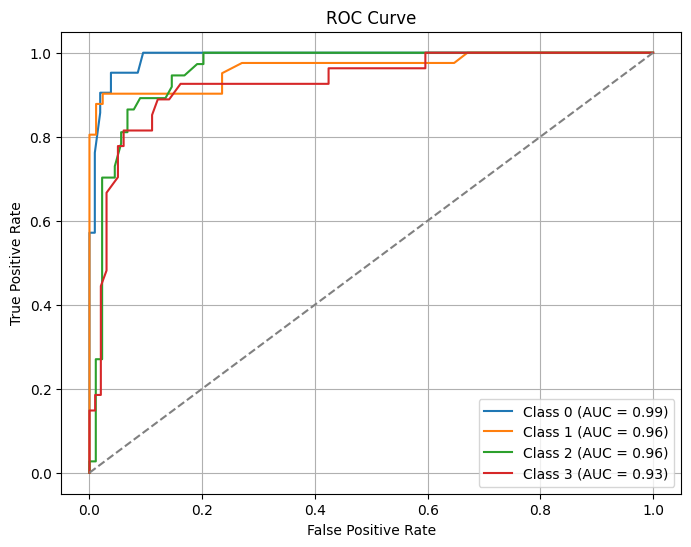

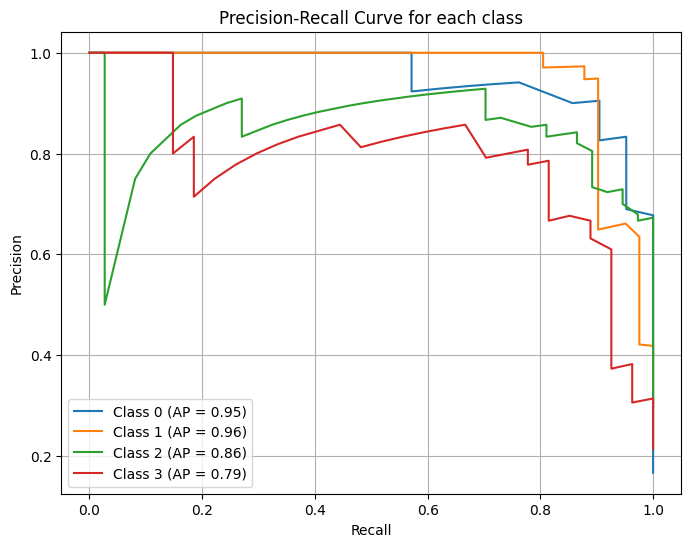

In [33]:
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have trained a classifier and obtained predictions stored in y_pred_labels and y_pred_proba

# Calculate F1 score
f1 = f1_score(y_test, y_pred_labels, average='weighted')
print('F1 Score:', f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print('Confusion Matrix:')
print(conf_matrix)

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_labels))

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    if np.sum(y_test == i) > 0:  # Check if the class has positive samples
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    average_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.grid(True)
plt.show()


